In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [3]:
df=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.isnull().sum() # So there is no need for missing value imputation

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


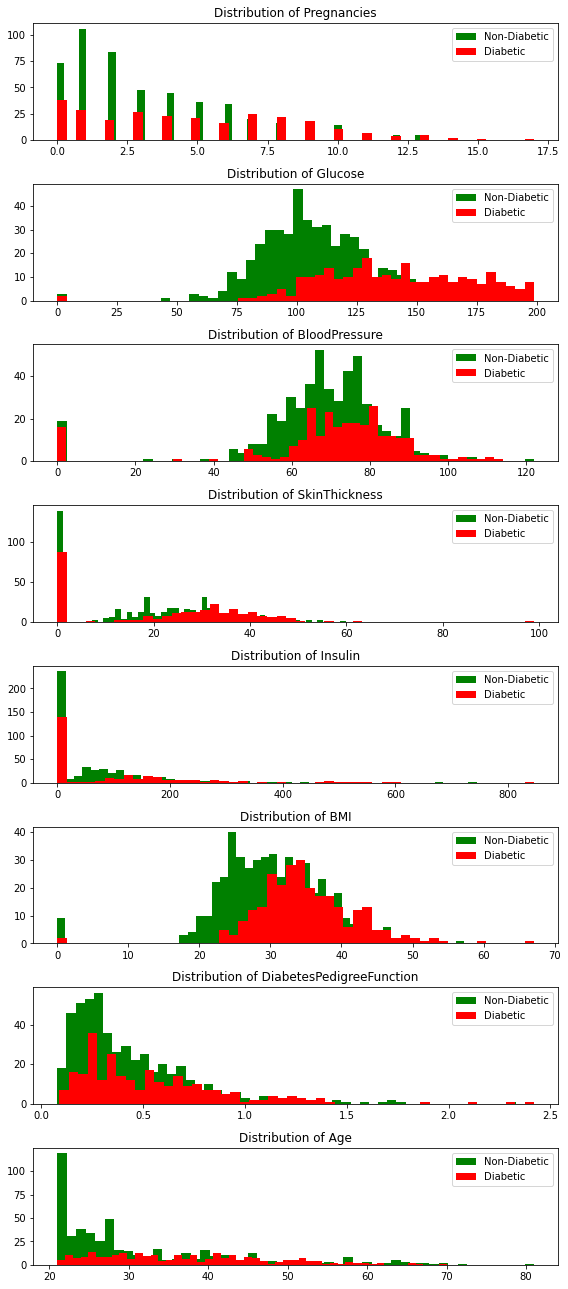

In [8]:
fig = plt.figure(figsize=(8,20))

for index,i in enumerate(df.columns[:-1]):
    ax = fig.add_subplot(len(df.columns),1,index+1)
    ax.hist(df[i].loc[df['Outcome']==0],color='Green',bins=50)
    ax.hist(df[i].loc[df['Outcome']==1],color='Red',bins=50)
    ax.legend(['Non-Diabetic','Diabetic'])
    
    ax.set_title('Distribution of '+ i)
    

plt.tight_layout()
plt.show()

From this we can understand that the zero points in BMI, Skin thickness, Blood pressure and Glucose are clearly outliers, However insulin could still be zero as the subject might not have been administered Insulin, thus the above mentioned outliers need to be treated

In [9]:
sorted(df['Glucose'].unique())[1]

44

In [10]:
# Removing and replacing the lower outliers with values lesser than the percentile described
def outlier_correction(df,feature,percentile):
    df.loc[((df[feature]==0)|(df[feature]<df[feature].quantile(percentile)))
                              ,feature]=df[feature].quantile(percentile)

    

In [11]:
# another alternative to remove the lowest(In our case zero) and replace them with the next smallest value
def outlier_minima(df,feature):
    df.loc[df[feature]==df[feature].min(),feature]=sorted(df[feature].unique())[1]
    #return df

In [12]:
outlier_minima(df,'Glucose')
outlier_minima(df,'BloodPressure')
outlier_minima(df,'SkinThickness')
outlier_minima(df,'BMI')

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.180990,70.199219,22.605469,79.799479,32.253255,0.471876,33.240885,0.348958
std,3.369578,31.071433,15.759706,13.401408,115.244002,7.081048,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,7.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


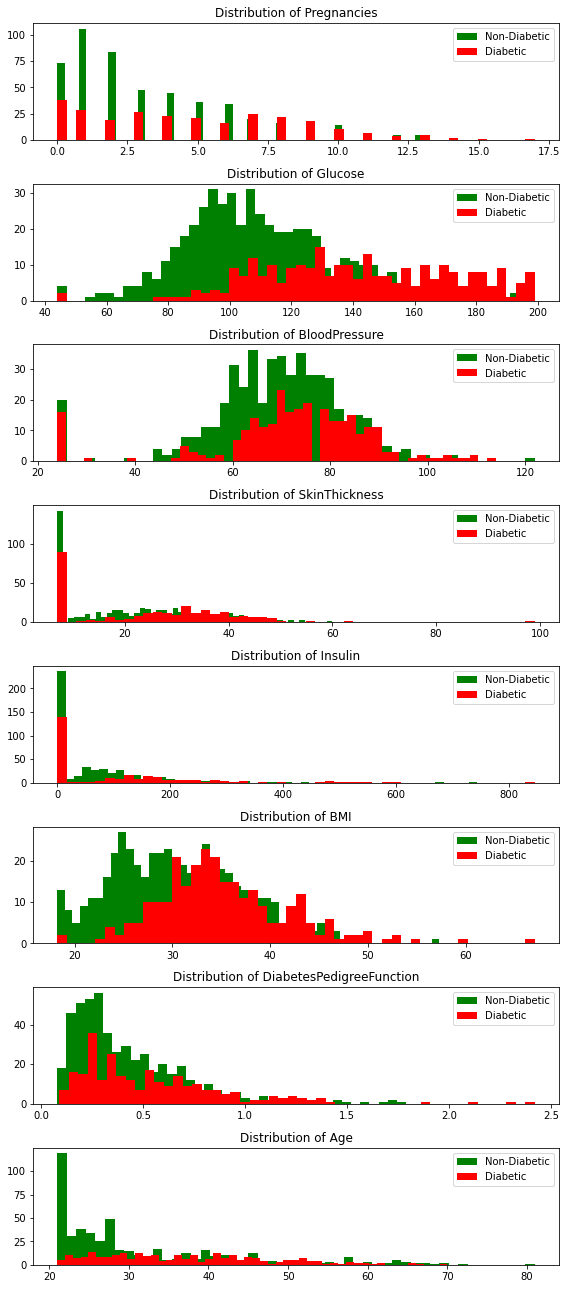

In [14]:
# Distribution after outlier correction
fig = plt.figure(figsize=(8,20))

for index,i in enumerate(df.columns[:-1]):
    ax = fig.add_subplot(len(df.columns),1,index+1)
    ax.hist(df[i].loc[df['Outcome']==0],color='Green',bins=50)
    ax.hist(df[i].loc[df['Outcome']==1],color='Red',bins=50)
    ax.legend(['Non-Diabetic','Diabetic'])
    
    ax.set_title('Distribution of '+ i)
    

plt.tight_layout()
plt.show()

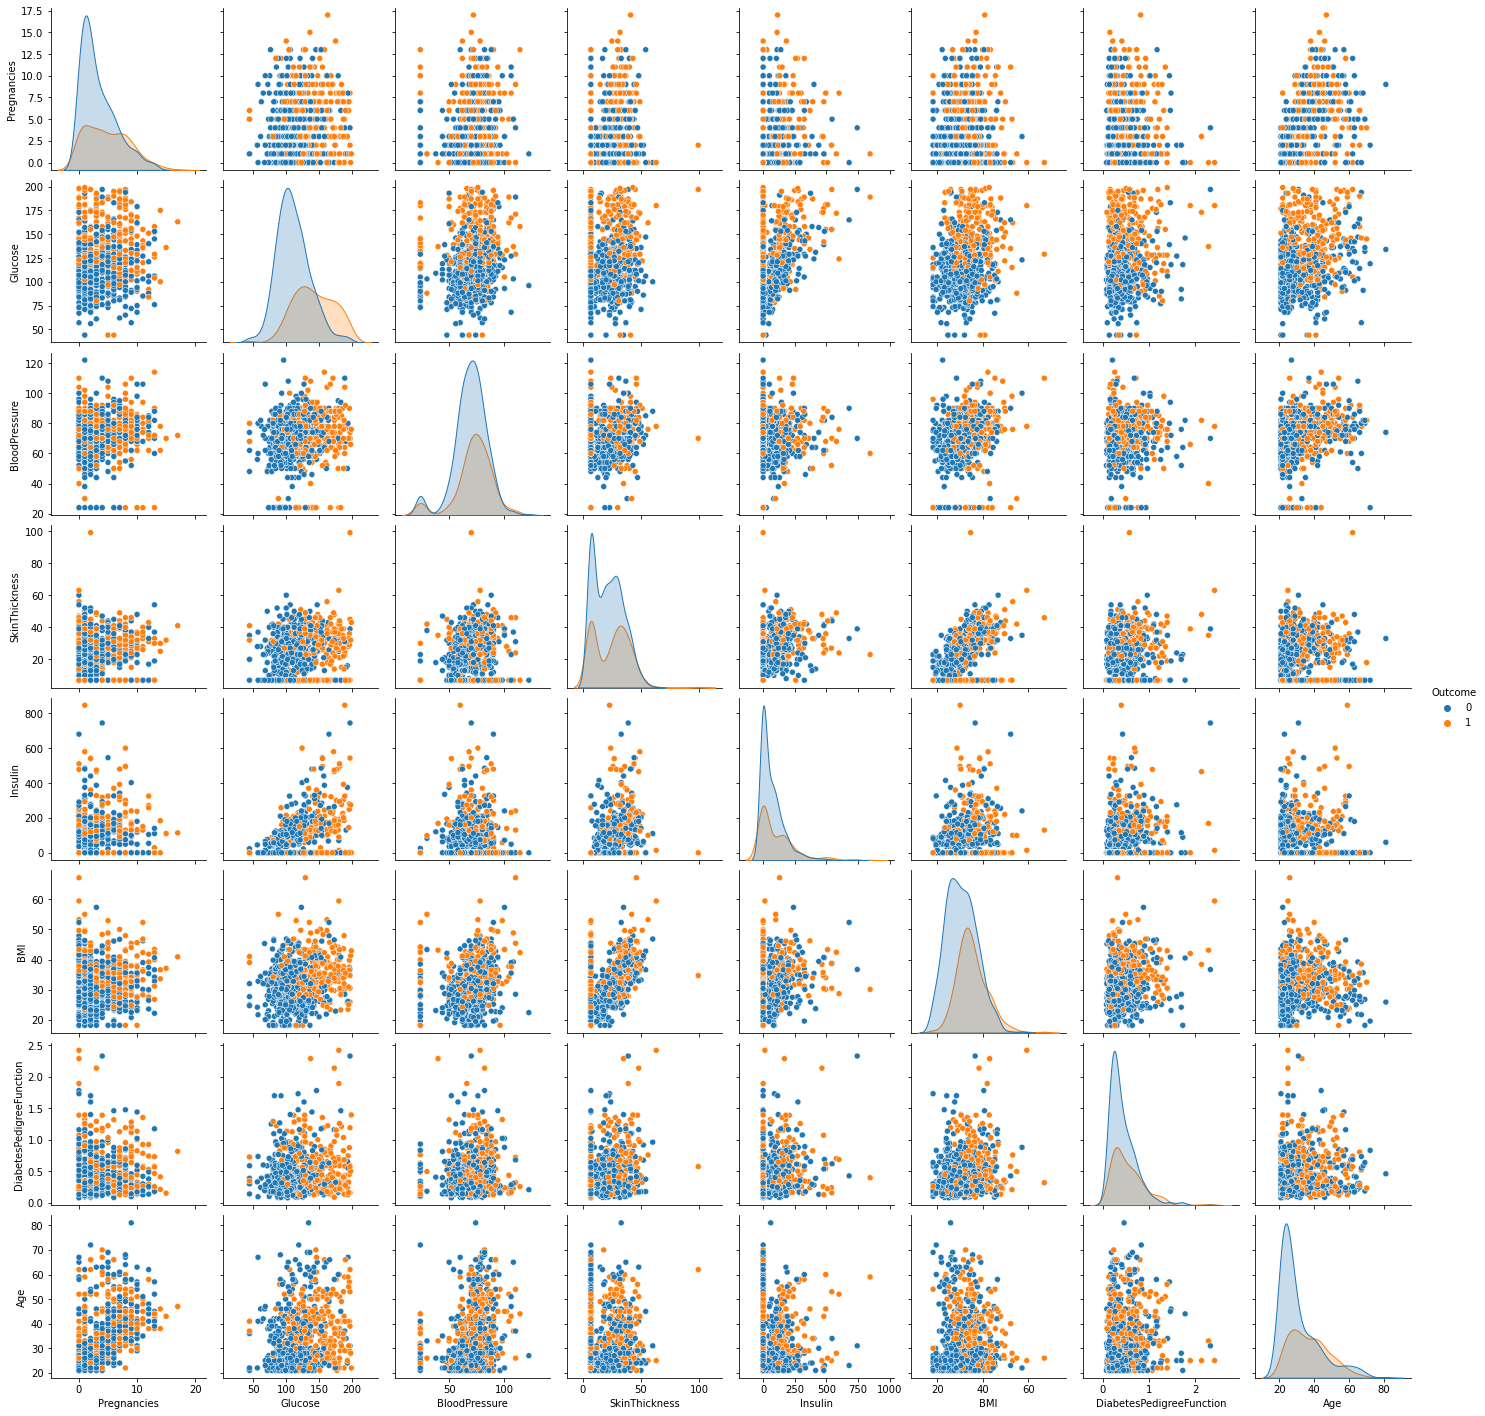

In [15]:
sns.pairplot(df,hue='Outcome')

Not a linear distribution clearly, so it would be better to try ensemble techniques

### Machine learning phase

In [40]:
#Converting to arrays
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
np.unique(y,return_counts=True) # Imbalanced Data, Better to use stratification

(array([0, 1]), array([500, 268]))

### Trying Leave one out with several algorithms, Post normalization

In [18]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
from sklearn.utils import shuffle
import lightgbm
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")
#X=df
#shuffle data
X, y = shuffle(X, y, random_state=20)
#
#model
#clf= XGBClassifier()
clf=RandomForestClassifier(class_weight='balanced')
#clf=lightgbm.LGBMClassifier(is_unbalance=True)
#clf = KNeighborsClassifier(n_neighbors=10, weights = 'distance')
#
#leave-one-out
y_pred = np.array([])
y_true = np.array([])
loo = LeaveOneOut()
for train_index, test_index in loo.split(X):
    X_train = X.iloc[train_index,:]
    X_test = X.iloc[test_index,:]
    y_train = y[train_index]
    y_test = y[test_index]
    #
    #normalize data
    X_train_mean = np.mean(X_train, axis=0)
    X_train_std = np.std(X_train, axis=0)
    X_train_norm = (X_train - X_train_mean)/X_train_std
    X_test_norm = (X_test - X_train_mean)/X_train_std
    #
    #train
    clf.fit(X_train_norm, y_train)
    #
    #test
    y_pred = np.append(y_pred,clf.predict(X_test_norm))
    y_true = np.append(y_true,y_test)
#
#metrics
print("Labels: Non-Diabetic, Diabetic")
print("Confusion matrix")
print(metrics.confusion_matrix(y_true, y_pred))
print("Precision")
print(metrics.precision_score(y_true, y_pred, average=None))
print("Recall")
print(metrics.recall_score(y_true, y_pred, average=None))
print("F1 score")
print(metrics.f1_score(y_true, y_pred, average=None))
print(metrics.f1_score(y_true, y_pred, average='weighted'))
print(metrics.accuracy_score(y_true,y_pred))

Labels: Non-Diabetic, Diabetic
Confusion matrix
[[455  45]
 [239  29]]
Precision
[0.6556196  0.39189189]
Recall
[0.91       0.10820896]
F1 score
[0.76214405 0.16959064]
0.5553676031228266
0.6302083333333334


|Algorithm | Accuracy |  F1 Score |
|----------|----------|-----------|
| KNN-10   |  0.58    |   0.54    |
| LGB      |  0.53    |   0.529   |
| RF       |  0.63    |   0.56    |

### Random forest most effective, 5 fold cross validation, No normalisation

In [35]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=8,class_weight={0:0.28,1:0.72})
scores = cross_val_score(clf, X, y, cv=5)

f1=cross_val_score(clf, X, y, cv=5,scoring='f1_weighted')
scores

array([0.74025974, 0.77922078, 0.80519481, 0.71895425, 0.76470588])

In [36]:
f1

array([0.73431856, 0.76115762, 0.80057406, 0.71831505, 0.74152204])

In [37]:
scores.mean()

0.7616670910788559

In [38]:
f1.mean()

0.7511774668487068

Although not great results could be achieved by giving higher weights to the diabetic styate one could reduce false negatives and there is a decent accuracy and F1 score

In [42]:
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
import sklearn
#from sklearn import cross_validation

#shuffle data
X, y = shuffle(X, y, random_state=20)


clf1=RandomForestClassifier(class_weight='balanced')
param_dist = {'n_estimators': [100,150,200,300],
              'min_samples_split':[1,2,4],
              'max_depth': [3, 5, 6, 8, 9],
              'min_samples_leaf':[1,2,3]
             }
              
              
             
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'weighted')
#numFolds = 10
#kfold_5 = cross_validation.KFold(n = len(X), shuffle = True, n_folds = numFolds)

clfcv = RandomizedSearchCV(clf1, 
                         param_distributions = param_dist,
                         cv = 5,  
                         n_iter = 20, 
                         scoring = scorer, 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1,random_state=20)

In [46]:
clfcv.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, error_score=0,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 6, 8, 9],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 2, 4],
                                        'n_estimators': [100, 150, 200, 300]},
                   random_state=20,
                   scoring=make_scorer(f1_score, average=weighted), verbose=3)

In [47]:
clfcv.best_score_

0.7731524736771827

The f1 score obtained after Random search cross validation for tuning the model

In [49]:
clfcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [50]:
clfcv.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=4)

After Random search Cv we get an F1 score of 77.18,
Thus although the predictions will not be up to the mark, upon tuning the model using Randomsied search cross validation, an F1 score of 77.18 has been obtained, Also since it is an imbalanced data set, it is better to rely on the F1 score as we had already seen in the Leave one out cross validation step that there are a lot of False Negatives